In [61]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf 
import cv2


input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format


for i in range(1,2):
    filter_num = i*4
    ## Build the Convolution autoencoders model

    x = Conv2D(filter_num, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(filter_num, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    #x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    #encoded = MaxPooling2D((2, 2), padding='same')(x)


    x = Conv2D(filter_num, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(filter_num, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    #x = Conv2D(16, (3, 3), activation='relu')(x)
    #x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)




    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

    from keras.datasets import mnist
    import numpy as np

    (x_train, _), (x_test, _) = mnist.load_data()

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
    x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

    from keras.callbacks import TensorBoard

    autoencoder.fit(x_train, x_train,
                                        epochs=30,
                                        batch_size=128,
                                        shuffle=True,
                                        validation_data=(x_test, x_test),
                                        callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])



#print(autoencoder.summary())


'''
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
'''

#decoded_images = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 17s 287us/sample - loss: 0.6899 - val_loss: 0.6893
Epoch 2/30
60000/60000 [==============================] - 24s 398us/sample - loss: 0.6885 - val_loss: 0.6876
Epoch 3/30
60000/60000 [==============================] - 30s 495us/sample - loss: 0.6863 - val_loss: 0.6848
Epoch 4/30
60000/60000 [==============================] - 18s 297us/sample - loss: 0.6827 - val_loss: 0.6803
Epoch 5/30
60000/60000 [==============================] - 18s 293us/sample - loss: 0.6768 - val_loss: 0.6727
Epoch 6/30
60000/60000 [==============================] - 18s 294us/sample - loss: 0.6664 - val_loss: 0.6591
Epoch 7/30
60000/60000 [==============================] - 16s 264us/sample - loss: 0.6475 - val_loss: 0.6337
Epoch 8/30
60000/60000 [==============================] - 18s 307us/sample - loss: 0.6123 - val_loss: 0.5888
Epoch 9/30
60000/60000 [==============================] - 17s 286us/sample - l

"\nloss = autoencoder_train.history['loss']\nval_loss = autoencoder_train.history['val_loss']\nepochs = range(10)\nplt.figure()\nplt.plot(epochs, loss, 'bo', label='Training loss')\nplt.plot(epochs, val_loss, 'b', label='Validation loss')\nplt.title('Training and validation loss')\nplt.legend()\nplt.show()\n"

In [64]:
decoded_imgs = autoencoder.predict(x_test)


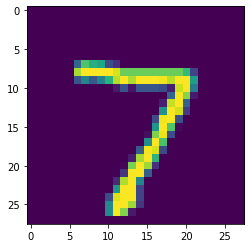

In [74]:
b = x_test[0]
b = b.reshape(28,28)
plt.imshow(b)


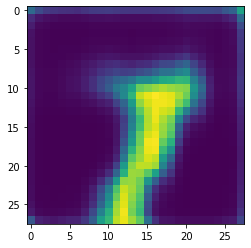

In [75]:

decoded_imgs.shape
a = decoded_imgs[0]
a = a.reshape(28,28)
plt.imshow(a)

In [ ]:
autoencoder.save('my_model.h5', save_format='tf')

In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

new_model = tf.keras.models.load_model('my_model.h5')

In [2]:
print(new_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 4)         148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 4)           148       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 4)         0     

In [13]:
test_img = cv2.imread('test1.png',cv2.IMREAD_GRAYSCALE)
test_img.shape


(225, 225)

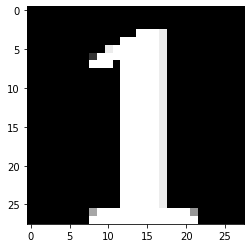

In [58]:
#Do scale
test_img = abs(255-test_img)
test_img = test_img/255



#change the input shape
new_img = cv2.resize(test_img,(28, 28))
new_img.shape
plt.imshow(new_img,cmap='gray')

new_img1 = new_img.reshape(1,28,28,1) 


In [59]:
new_img1.shape

(1, 28, 28, 1)

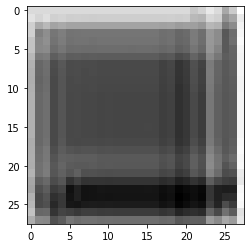

In [60]:
pred = new_model.predict(new_img1)

output = pred.reshape(28,28) 
output.shape


plt.imshow(output,cmap='gray')




SyntaxError: invalid syntax (<ipython-input-37-e69e7026355c>, line 1)

(60000, 28, 28)
(60000, 28, 28, 1)
